# Proyecto Manipulación de datos en base de datos retail

# ¡Llena ese carrito!

# Tabla de contenido
1. [Introducción](#Introducción)
2. [Paso 1. Descripción de los datos](#Paso-1.-Descripción-de-los-datos)
3. [Paso 2. Preprocesamiento de los datos](#Paso-2.-Preprocesamiento-de-los-datos)
4. [Paso 3. Análisis de los datos](#Paso-3.-Análisis-de-los-datos)
5. [Conclusion general del proyecto](#Conclusion-general-del-proyecto)

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


Para el revisor: envío el avance del proyecto del Sprint 4, logré terminar hasta la primera parte del inciso 7, las respuestas para el inciso 5 y partes del inciso 6 las tuve que resolver en la parte 2 del proyecto ya que las instrucciones se repetían y no me permitía resolver los problemas del inciso 5 y 6. Muchas gracias por su tiempo para revisar el proyecto y agredezco de antemano sus observaciones. Aimée Domínguez Nieto.

PARA EL REVISOR: tercera iteracción, necesito su ayuda ya que no se porqué ahora el programa no se ejecuta a partir del ejercicio 7.9 y el ejercicio 7.10 y 7.11 ya los había ejecutado correctamente. Agradezco su ayuda y tiempo para revisar el proyecto.

## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv# leer conjuntos de datos en los DataFrames

Instacart_orders DataFrame

In [3]:
instacart_orders = pd.read_csv('./datasets/instacart_orders.csv',sep=';') 

In [4]:
instacart_orders.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [6]:
instacart_orders.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,4.789670e+05,478967.000000,478967.000000,478967.000000,478967.000000,450148.000000
mean,1.709947e+06,102966.537475,17.157808,2.775058,13.446676,11.101751
std,9.869480e+05,59525.328991,17.704688,2.045869,4.224986,9.189975
min,4.000000e+00,2.000000,1.000000,0.000000,0.000000,0.000000
25%,8.564685e+05,51414.000000,5.000000,1.000000,10.000000,4.000000
50%,1.709522e+06,102633.000000,11.000000,3.000000,13.000000,7.000000
75%,2.562990e+06,154419.000000,23.000000,5.000000,16.000000,15.000000
max,3.421079e+06,206209.000000,100.000000,6.000000,23.000000,30.000000


Products DataFrame

In [7]:
products = pd.read_csv('./datasets/products.csv', sep=';')

In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
products.describe()

,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


Aisles DataFrame

In [11]:
aisles = pd.read_csv('./datasets/aisles.csv',sep=';')# mostrar información del DataFrame

In [12]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [13]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [14]:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


Departments DataFrame

In [15]:
departments = pd.read_csv('./datasets/departments.csv', sep=';')# mostrar información del DataFrame

In [16]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [17]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [18]:
departments.describe()

,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


Order_products DataFrame

In [19]:
order_products = pd.read_csv('./datasets/order_products.csv',sep=';')

In [20]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [21]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [22]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

Instacart_orders DataFrame

Verifica y corrige los tipos de datos en Instacart_orders DataFrame

In [23]:
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [24]:
instacart_orders.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


Las columnas de id son números enteros

Identifica y completa valores ausentes en Instacart_orders DataFrame

In [25]:
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64


En la columna days_since_prior_order hay 28819 valores ausentes

In [26]:
columns_to_replace=['days_since_prior_order']

In [27]:
for col in columns_to_replace: instacart_orders[col].fillna('unknown',inplace=True)

C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_22172\229811121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for col in columns_to_replace: instacart_orders[col].fillna('unknown',inplace=True)
C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_22172\229811121.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  for col in column

In [28]:
print(instacart_orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Los valores ausentes en la columna days_since_prior_order fueron reemplazados con 'unknown'

Identifica y elimina los valores duplicados

# 5 Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones). 

# 5.1 orders data frame

In [29]:
print(instacart_orders.duplicated().sum())# Revisa si hay pedidos duplicados


15


In [30]:
print(instacart_orders.value_counts())

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
2232988   82565    1             3          2                  unknown                   2
391768    57671    19            3          2                  10.0                      2
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
794638    50898    24            3          2                  2.0                       2
                                                                                        ..
1141450   25304    1             6          17                 unknown                   1
1141443   6710     36            5          14                 3.0                       1
1141432   148777   26            3          12                 9.0                       1
1141423   187929   14            4          14                 8.0                       1
3421

Las primeras 5 líneas están duplicadas y fueron pedidos hechos el día miércoles a las 2 a.m.

In [31]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_wed_2am = instacart_orders[(instacart_orders['order_dow']==3) & (instacart_orders['order_hour_of_day']==2)]

In [32]:
print(orders_wed_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7

In [33]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)

In [34]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

0


In [35]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
order_id = instacart_orders['order_id']

In [36]:
order_id_duplicates = (order_id.duplicated().sum())

In [37]:
print(order_id_duplicates)

0


Products DataFrame

Verifica y corrige los tipos de datos en Products DataFrame

In [38]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [39]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


La columna de product_id son números enteros

Identifica y completa valores ausentes en Products DataFrame

In [40]:
print(products.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


En la columna product_name hay 1258 valores ausentes 

In [41]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


# 5.2  products data frame

In [42]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


En el dataframe de products no hay valores duplicados

In [43]:
# Revisa únicamente si hay ID de departamentos duplicados
department_id = products['department_id']

In [44]:
department_id_duplicates = (department_id.duplicated().sum())

In [45]:
print(department_id_duplicates)

49673


In [46]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()

In [47]:
product_name = products['product_name']

In [48]:
product_name_duplicates = (product_name.duplicated().sum())

In [49]:
print(product_name_duplicates)

1361


In [50]:
print(products.value_counts())

product_id  product_name                                       aisle_id  department_id
1           CHOCOLATE SANDWICH COOKIES                         61        19               1
33112       KRINKLE CUT CAROLINA BBQ POTATO CHIPS              107       19               1
33103       FRESH GROUND TURKEY- 85% LEAN/15% FAT              35        12               1
33104       ORGANIC UNSWEETENED KETCHUP                        72        13               1
33105       FRENCH VANILLA CONCENTRATED LIQUID COFFEE CREAMER  53        16               1
                                                                                         ..
16570       ORGANIC FRESH CARROT CHIPS                         123       4                1
16571       UNBLEACHED JUMBO BAKING CUPS                       97        13               1
16572       SUPER GLUE GEL CONTROL                             87        17               1
16573       3 CHEESE RAVIOLI                                   38        1           

In [51]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products['product_name'].duplicated().sum() & (products['product_id']))

0         1
1         0
2         1
3         0
4         1
         ..
49689    16
49690    17
49691    16
49692    17
49693    16
Name: product_id, Length: 49694, dtype: int64


In [52]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(~products['product_name'].isna()) & (products['product_name'].str.lower().duplicated())]

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Está solicitando en los productos en existencia si hay productos duplicados, filtré esas dos condiciones

Hay 104 nombres duplicados dentro de los productos en existencia

In [53]:
columns_to_replace = ['product_name']

In [54]:
for col in columns_to_replace: products[col].fillna('unknown',inplace=True)

In [55]:
print(products.isna().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


Los valores ausentes en la columna product_name fueron reemplazados con 'unknown'

Aisles DataFrame

Verifica y corrige los tipos de datos en Aisles DataFrame

In [56]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [57]:
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


La columna aisles_id son números enteros

Identifica y completa valores ausentes en Products DataFrame

In [58]:
print(aisles.isna().sum())

aisle_id    0
aisle       0
dtype: int64


En el dataframe aisles no hay valores ausentes

Identifica y elimina los valores duplicados

# 5.4  aisles data frame

In [59]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [60]:
# Revisa únicamente si hay IDs duplicadas de productos
aisle_id = aisles['aisle_id']

In [61]:
aisle_id_duplicates = (aisle_id.duplicated().sum())

In [62]:
print(aisle_id_duplicates)

0


No hay duplicados de aisle_id en el dataframe de aisles

Departments DataFrame

Verifica y corrige los tipos de datos en Departments DataFrame

In [63]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [64]:
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


La columna de department_id es un número entero

Identifica y completa valores ausentes en Departments DataFrame

In [65]:
print(departments.isna().sum())

department_id    0
department       0
dtype: int64


En el dataframe departments no hay valores ausentes

Identifica y elimina los valores duplicados en el departments dataframe

# 5.3  departments data frame¶

In [66]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum()) 

0


In [67]:
# Revisa únicamente si hay IDs duplicadas de productos
department_id = departments['department_id']

In [68]:
department_id_duplicates = (department_id.duplicated().sum())

In [69]:
print(department_id_duplicates)

0


No hay department_id duplicados en el dataframe de departments

Order_products DataFrame

Verifica y corrige los tipos de datos en Order_products DataFrame

In [70]:
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [71]:
order_products.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
5,2456893,21616,4.0,1
6,644579,12341,5.0,1
7,2231852,44925,10.0,1
8,3185766,36259,14.0,1
9,420019,23315,4.0,1


En la columna order_id son números enteros

Identifica y completa valores ausentes en order_products DataFrame

# 6.3 Order_products dataframe

In [72]:
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


En el dataframe order_products si encontramos 836 valores ausentes en la columna add_to_cart_order 

In [73]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max())

1.0 64.0


In [74]:
order_products.groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

In [75]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
abs_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]['order_id']

In [76]:
print(abs_add_to_cart)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [77]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
print(abs_add_to_cart > 64)

737        True
9926       True
14394      True
16418      True
30114      True
           ... 
4505662    True
4511400    True
4517562    True
4534112    True
4535739    True
Name: order_id, Length: 836, dtype: bool


In [78]:
order_products.groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

In [79]:
orders_ids_faltantes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [80]:
order_products[order_products['order_id'].isin(orders_ids_faltantes)].groupby('order_id')['product_id'].count().sort_values(ascending = False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
888470      65
1598369     65
747668      65
1677118     65
9310        65
Name: product_id, Length: 70, dtype: int64

In [81]:
len(orders_ids_faltantes)

70

Los pedidos con valores ausentes en 'add_to_cart_order' si tienen más de 64 productos

In [82]:
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
abs_add_to_cart = order_products[order_products['add_to_cart_order'].isna()].groupby('order_id')['product_id'].count().min()

In [83]:
print(abs_add_to_cart)

1


In [84]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
columns_to_replace=['add_to_cart_order']

In [85]:
for col in columns_to_replace: order_products[col].fillna('999',inplace=True)

C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_22172\310313437.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for col in columns_to_replace: order_products[col].fillna('999',inplace=True)
C:\Users\AIMEE DGUEZ NIETO\AppData\Local\Temp\ipykernel_22172\310313437.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '999' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  for col in columns_to_repla

In [86]:
print(order_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [87]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')

In [88]:
print(order_products['add_to_cart_order'])

0          17
1           1
2           1
3          35
4           5
           ..
4545002    12
4545003     9
4545004     4
4545005     8
4545006     9
Name: add_to_cart_order, Length: 4545007, dtype: int32


Los valores ausentes en la columna add_to_cart_order fueron reemplazados por '999' y se convirtió la columna al tipo entero

Identifica y elimina los valores duplicados en el order_products dataframe

# 5.5  order_products data frame¶

In [89]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [90]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products_cols = order_products[order_products.duplicated(['order_id', 'product_id'])]

In [91]:
print(order_products_cols)

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


No hay duplicados considerando las columnas 'order_id' y 'product_id' del dataframe order_products

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

Las respuestas de ésta sección las resolví en el punto 2 donde también solicitan encontrar y eliminar los valores duplicados de cada dataframe

### `instacart_orders` data frame

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

¿Qué sugiere este resultado?

Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [92]:
product_name = products['product_name']# Encuentra los valores ausentes en la columna 'product_name'

In [93]:
product_name_absent = (product_name.isna().sum())

In [94]:
print(product_name_absent)

0


In [95]:
print(products['product_name'].value_counts())

product_name
unknown                                                                 1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64


In [96]:
print(products.value_counts())

product_id  product_name                                      aisle_id  department_id
1           CHOCOLATE SANDWICH COOKIES                        61        19               1
33146       REVOLT KILLER CITRUS                              64        7                1
33124       HEALTHY KIDS ORGANIC CHOCOLATE NUTRITIONAL SHAKE  92        18               1
33125       ORGANIC MINI CHEDDAR CHEESE CRACKERS              78        19               1
33126       SESAME FLATBREAD                                  112       3                1
                                                                                        ..
16568       DISHWASHER DETERGENT                              74        17               1
16569       HUMMUS ORIGINAL                                   67        20               1
16570       ORGANIC FRESH CARROT CHIPS                        123       4                1
16571       UNBLEACHED JUMBO BAKING CUPS                      97        13               1
4969

Describe brevemente cuáles son tus hallazgos.

En el ejercicio 2 solicita identificar y eliminar los valores ausentes en la columna 'product_name', estos 1258 valores ausentes fueron identificados y cambiado su nombre por UNKNOWN

In [97]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print (product_name_absent & (products['aisle_id'] == 100))

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: aisle_id, Length: 49694, dtype: bool


In [98]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products['product_name'].isna()) & (products['aisle_id'] != 100)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

Los productos vacíos provienen del pasillo con ID 100

In [99]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(product_name_absent & (products['department_id'] == 21))

0        False
1        False
2        False
3        False
4        False
         ...  
49689    False
49690    False
49691    False
49692    False
49693    False
Name: department_id, Length: 49694, dtype: bool


In [100]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] != 21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

Los productos vacíos provienen del departamento con ID 21

In [101]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
dep21 = departments[departments['department_id']== 21] 

In [102]:
print(dep21)

    department_id department
20             21    missing


In [103]:
aisle100 = aisles[aisles['aisle_id'] == 100]

In [104]:
print(aisle100)

    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

Tanto el pasillo con ID 100 y el departamento con ID 21 no se encuentran en sus respectivas tablas

In [105]:
# Completa los nombres de productos ausentes con 'Unknown'
print(products['product_name'].value_counts())

product_name
unknown                                                                 1258
GREEN TEA WITH GINSENG AND HONEY                                           3
CARROT AND CELERY STICKS                                                   2
APRICOT ENERGY BAR                                                         2
PROACTIVE HEALTH INDOOR WEIGHT & HAIRBALL CARE WITH CHICKEN CAT FOOD       2
                                                                        ... 
ALL NATURAL CHICKEN APPLE SAUSAGE                                          1
QUARTERED ARTICHOKE HEARTS                                                 1
BIG EYE IPA                                                                1
UNSTOPABLES LUSH                                                           1
FRESH FOAMING CLEANSER                                                     1
Name: count, Length: 48333, dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Ya se habían renombrados los nombres de productos ausentes con unknown desde que lo solicitaron en el punto 2 del proyecto

### `orders` data frame

In [106]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [107]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
order = instacart_orders[(instacart_orders['days_since_prior_order'].isna()) & (instacart_orders['order_number']!=1)]

In [108]:
print(order)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los productos ausentes de instacart_orders fueron remplazados con unknown en la parte 2 del proyecto, no hay valores ausentes en el primer pedido del cliente

### `order_products` data frame

In [109]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


En la parte 2,  en el dataframe order_products integré éste ejercicio porque como pide que se anulen los productos ausentes si  ejecuto el código en este punto, ya no puedo resolver el ejercicio

Describe brevemente cuáles son tus hallazgos.

Describe brevemente cuáles son tus hallazgos.

Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [110]:
print(instacart_orders['order_hour_of_day'].describe())

count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


In [111]:
print(instacart_orders['order_hour_of_day'].unique())

[13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]


In [112]:
print(instacart_orders['order_hour_of_day'].value_counts())

order_hour_of_day
10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: count, dtype: int64


In [113]:
print(instacart_orders['order_dow'].describe())

count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


In [114]:
print(instacart_orders['order_dow'].unique())

[6 5 0 4 3 1 2]


In [115]:
print(instacart_orders['order_dow'].value_counts())

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: count, dtype: int64


Escribe aquí tus conclusiones

Ocupando el método describe confirmé en el instacart_orders dataframe, que en la columna 'order_hour_of_day' el valor mínimo es 0 y el valor máximo es 23. En la columna 'order_dow' el valor mínimo es 0 y el valor máximo es 6.

Ocupé las funciones .unique() y .value_counts() para revisar que los valores sean sensibles.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [116]:
hr_per = instacart_orders.groupby('order_hour_of_day')['user_id'].count().sort_index()

In [117]:
print(hr_per)

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: user_id, dtype: int64


<Axes: title={'center': 'Cantidad de personas comprando por hora del día'}, xlabel='Hora (24 hrs.)', ylabel='Pedidos'>

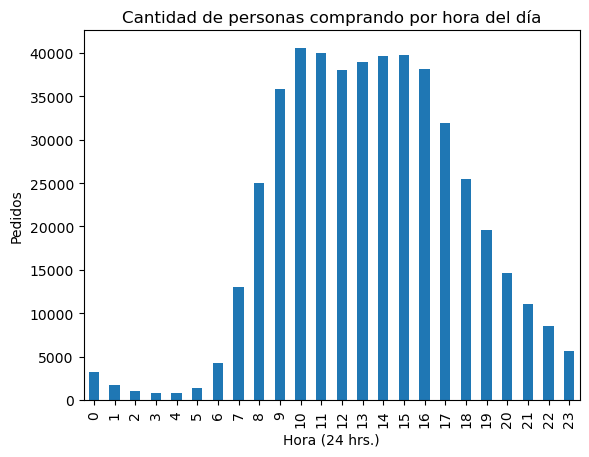

In [118]:
hr_per.plot(kind = 'bar', title = 'Cantidad de personas comprando por hora del día', ylabel = 'Pedidos', xlabel = 'Hora (24 hrs.)')

Escribe aquí tus conclusiones

Las personas compran más a las 10 am y a las 15 pm

### [A3] ¿Qué día de la semana compran víveres las personas?

In [119]:
día_per = instacart_orders.groupby('order_dow')['user_id'].count().sort_index()

In [120]:
print(día_per)

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64


<Axes: title={'center': 'Día de la semana en que compran víveres las personas'}, xlabel='Día de la semana', ylabel='Pedidos'>

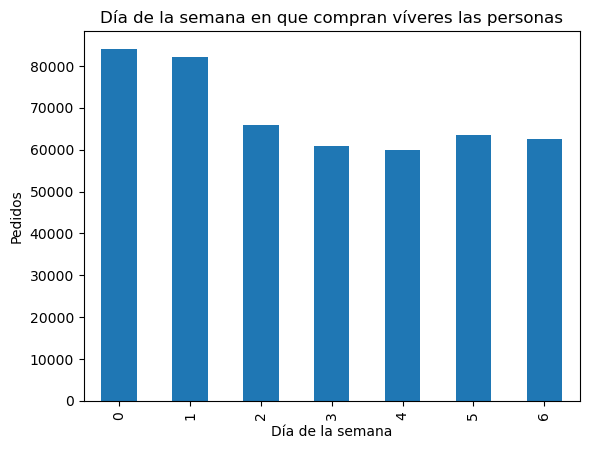

In [121]:
día_per.plot(kind = 'bar', title = 'Día de la semana en que compran víveres las personas', ylabel = 'Pedidos', xlabel = 'Día de la semana')

Los días domingo y lunes más personas realizan sus compras.

Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [122]:
tiempo_per = instacart_orders.groupby('days_since_prior_order')['user_id'].count()

In [123]:
print(tiempo_per)

days_since_prior_order
0.0         9589
1.0        20179
2.0        27138
3.0        30224
4.0        31006
5.0        30096
6.0        33930
7.0        44577
8.0        25361
9.0        16753
10.0       13309
11.0       11467
12.0       10658
13.0       11737
14.0       13992
15.0        9416
16.0        6587
17.0        5498
18.0        4971
19.0        4939
20.0        5302
21.0        6448
22.0        4514
23.0        3337
24.0        3015
25.0        2711
26.0        2640
27.0        2986
28.0        3745
29.0        2673
30.0       51337
unknown    28817
Name: user_id, dtype: int64


<Axes: title={'center': 'Días que esperan las personas para realizar el siguiente pedido'}, xlabel='Días de espera para el siguiente pedido', ylabel='Número de clientes'>

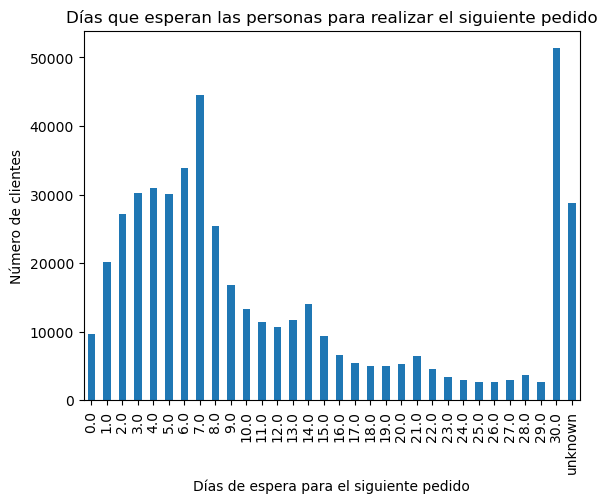

In [124]:
tiempo_per.plot(kind = 'bar', title = 'Días que esperan las personas para realizar el siguiente pedido', ylabel = 'Número de clientes', xlabel = 'Días de espera para el siguiente pedido')

La mayoría de las personas esperan 30 días, es decir realizan sus compras mensualmente. El día de menos compras es el 26.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [125]:
dia_mier = instacart_orders['order_dow']==3

In [126]:
ohd_order_mier = instacart_orders[dia_mier]['order_hour_of_day'].value_counts().sort_index()

In [127]:
print(ohd_order_mier)

order_hour_of_day
0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: count, dtype: int64


In [128]:
dia_sáb = instacart_orders['order_dow']==6

In [129]:
ohd_order_sáb = instacart_orders[dia_sáb]['order_hour_of_day'].value_counts().sort_index()

In [130]:
print(ohd_order_sáb)

order_hour_of_day
0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: count, dtype: int64


In [131]:
ohd_order = pd.concat([ohd_order_mier, ohd_order_sáb], axis = 1)

In [132]:
ohd_order.columns = ['Miércoles', 'Sábado']

In [133]:
print(ohd_order)

                   Miércoles  Sábado
order_hour_of_day                   
0                        373     464
1                        215     254
2                        106     177
3                        101     125
4                        108     118
5                        170     161
6                        643     451
7                       1732    1619
8                       3125    3246
9                       4490    4311
10                      5026    4919
11                      5004    5116
12                      4688    5132
13                      4674    5323
14                      4774    5375
15                      5163    5188
16                      4976    5029
17                      4175    4295
18                      3463    3338
19                      2652    2610
20                      1917    1847
21                      1450    1473
22                      1154    1185
23                       718     893


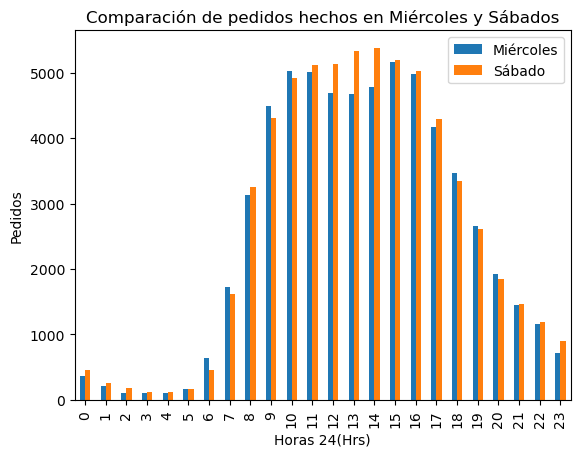

In [134]:
ohd_order.plot(title='Comparación de pedidos hechos en Miércoles y Sábados', kind = 'bar', xlabel= 'Horas 24(Hrs)' ,ylabel= 'Pedidos') 
plt.show()

Escribe aquí tus conclusiones

El sábado entre 12 pm y 2 pm incrementan las órdenes de pedido y en ese período de tiempo el miércoles estás órdenes de pedido disminuyen, quizá porque el miércoles es un día laborable.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [135]:
pedidos_por_cliente = instacart_orders.groupby('user_id')['order_id'].nunique()

In [136]:
pedidos_por_cliente = pedidos_por_cliente.sort_values(ascending = False)

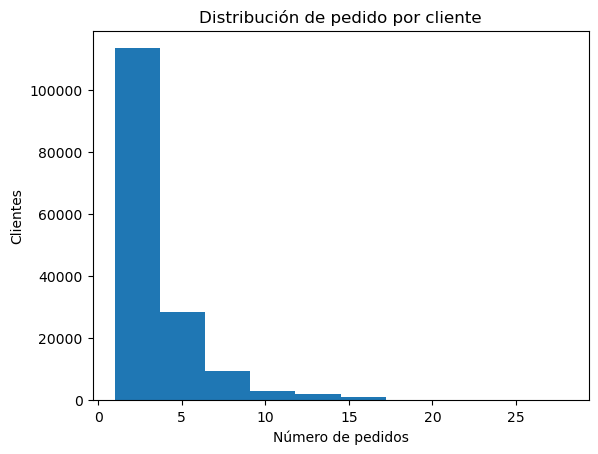

In [137]:
pedidos_por_cliente.plot(kind = 'hist', title = 'Distribución de pedido por cliente', xlabel = 'Número de pedidos', ylabel = 'Clientes')
plt.show()

In [138]:
pedidos_por_cliente.describe()

count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: order_id, dtype: float64

La mayoría de los clientes compran entre 1 y 5 productos, algunos clientes compran entre 5 y 10 productos, y a partir de 10 productos las compras disminuyen.

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [139]:
df_merged = products.merge(order_products, left_on = 'product_id', right_on = 'product_id' )

In [140]:
print(df_merged)

         product_id                product_name  aisle_id  department_id  \
0                 1  CHOCOLATE SANDWICH COOKIES        61             19   
1                 1  CHOCOLATE SANDWICH COOKIES        61             19   
2                 1  CHOCOLATE SANDWICH COOKIES        61             19   
3                 1  CHOCOLATE SANDWICH COOKIES        61             19   
4                 1  CHOCOLATE SANDWICH COOKIES        61             19   
...             ...                         ...       ...            ...   
4545002       49694     BURRITO- STEAK & CHEESE        38              1   
4545003       49694     BURRITO- STEAK & CHEESE        38              1   
4545004       49694     BURRITO- STEAK & CHEESE        38              1   
4545005       49694     BURRITO- STEAK & CHEESE        38              1   
4545006       49694     BURRITO- STEAK & CHEESE        38              1   

         order_id  add_to_cart_order  reordered  
0         1104373                 11 

In [141]:
product_20 = df_merged.groupby(['product_id','product_name'])['order_id'].count()

In [142]:
popular_products = product_20.sort_values(ascending = False)

In [143]:
popular_20_products = popular_products.head(20)

In [144]:
print(popular_20_products)

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
Name: order_id, dtype: int64


En la tabla se muestran los 20 productos más populares empezando la lista con BANANA.

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [145]:
productos_por_pedido = order_products.groupby('order_id')['product_id'].count()

In [146]:
print(productos_por_pedido)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64


In [147]:
hist_val = productos_por_pedido.value_counts().sort_index()

In [148]:
print(hist_val)

product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64


<Axes: title={'center': 'Productos comprados por pedido'}, xlabel='Número de productos', ylabel='Número de pedidos'>

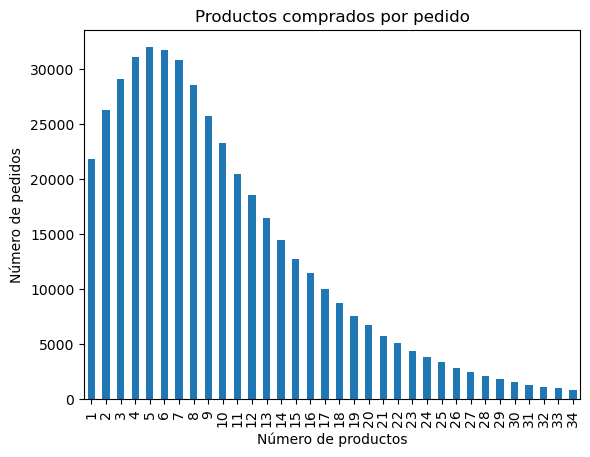

In [149]:
hist_val[hist_val.index < 35].plot(kind = 'bar', title = 'Productos comprados por pedido', xlabel = 'Número de productos', ylabel = 'Número de pedidos') 

La mayoría de las personas compran 5 artículos por pedido.

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [150]:
product_id_merged = products.merge(order_products, on = 'product_id')

In [151]:
product_por_order = product_id_merged [product_id_merged['reordered'] == 1]

In [152]:
product_por_order.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending = False).head(20)

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

La lista de los 20 artículos que se piden con mayor frecuencia empiezan con BANANAS y ORGANIC BANANAS, y los 6 primeros elementos de ésta lista coinciden en ser los mismos que en la lista de los 20 productos  más populares.

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [153]:
product_id_merged = products.merge(order_products, on = 'product_id')

In [154]:
print(product_id_merged.head(3))

   product_id                product_name  aisle_id  department_id  order_id  \
0           1  CHOCOLATE SANDWICH COOKIES        61             19   1104373   
1           1  CHOCOLATE SANDWICH COOKIES        61             19   1774977   
2           1  CHOCOLATE SANDWICH COOKIES        61             19    652770   

   add_to_cart_order  reordered  
0                 11          1  
1                  4          1  
2                 10          0  


In [155]:
product_id_merged.groupby(['product_id', 'product_name'])['reordered'].mean()

product_id  product_name                                                     
1           CHOCOLATE SANDWICH COOKIES                                           0.564286
2           ALL-SEASONS SALT                                                     0.000000
3           ROBUST GOLDEN UNSWEETENED OOLONG TEA                                 0.738095
4           SMART ONES CLASSIC FAVORITES MINI RIGATONI WITH VODKA CREAM SAUCE    0.510204
7           PURE COCONUT WATER WITH ORANGE                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [156]:
order_merged = order_products.merge(instacart_orders, on = 'order_id')

In [157]:
print(order_merged.head(3))

   order_id  product_id  add_to_cart_order  reordered  user_id  order_number  \
0   2141543       11440                 17          0    58454            25   
1    567889        1560                  1          1   129474            16   
2   2261212       26683                  1          1    47476             5   

   order_dow  order_hour_of_day days_since_prior_order  
0          0                 15                    8.0  
1          1                 13                   14.0  
2          6                  9                   13.0  


In [158]:
order_merged.groupby('user_id')['reordered'].mean()

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [159]:
pro_ord_merge = order_products.merge(products)

In [160]:
pri_en_carro = pro_ord_merge[pro_ord_merge['add_to_cart_order'] == 1]

In [161]:
pri_en_carro

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
14,1961225,37553,1,1,ICED COFFEE LIGHTLY SWEET,26,7
16,639939,10017,1,1,TILAPIA FILET,39,12
23,750040,8518,1,0,ORGANIC RED ONION,83,4
...,...,...,...,...,...,...,...
4544978,1759009,46175,1,0,HALF BAKED® ICE CREAM,37,1
4544989,115427,20842,1,1,TOTAL 0% GREEK YOGURT,120,16
4544990,2049780,28576,1,1,VANILLA BEAN CHIA POD,120,16
4544997,2300092,10017,1,0,TILAPIA FILET,39,12


In [162]:
pri_art = pri_en_carro.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending = False)

In [163]:
pri_art

product_id  product_name                                               
24852       BANANA                                                         15562
13176       BAG OF ORGANIC BANANAS                                         11026
27845       ORGANIC WHOLE MILK                                              4363
21137       ORGANIC STRAWBERRIES                                            3946
47209       ORGANIC HASS AVOCADO                                            3390
                                                                           ...  
10981       CLOUD WHITE DECORATING CUPCAKE ICING                               1
10985       PREMIUM TWIN PACK ROCK CORNISH GAME HEN                            1
38272       ORGANIC RAW COCONUT FLOUR                                          1
10989       GARBAGE DISPOSAL FRESHENER & CLEANER RED PEAR WITH MAGNOLIA        1
36996       COOL SPORT SPRAY-ON SUNSCREEN SPF 50                               1
Name: product_id, Length: 26760, dtyp

In [164]:
pri_art_df = pri_art.reset_index(name = 'count')

In [165]:
pri_art_df.head(20)

,product_id,product_name,count
0,24852,BANANA,15562
1,13176,BAG OF ORGANIC BANANAS,11026
2,27845,ORGANIC WHOLE MILK,4363
3,21137,ORGANIC STRAWBERRIES,3946
4,47209,ORGANIC HASS AVOCADO,3390
5,21903,ORGANIC BABY SPINACH,3336
6,47766,ORGANIC AVOCADO,3044
7,19660,SPRING WATER,2336
8,16797,STRAWBERRIES,2308
9,27966,ORGANIC RASPBERRIES,2024


# Conclusion general del proyecto:

Para resolver el proyecto se analizaron los archivos y se encontró que tenían un formato no estándar, para cargarlos de manera correcta en el read_cv se incluyó sep =';'.
Se procesaron los datos, se corrigieron los tipos de datos, se identificaron y completaron los productos ausentes y por último se identificaron y eliminaron los valores duplicados.
En el análisis se encontró:
-Las personas compran más a las 10 am y a las 15 pm y los días domingo y lunes realizan sus compras. La mayoría de las personas esperan 30 días, es decir realizan sus compras mensualmente.
-se hizó una comparación entre miércoles y sábado; el sábado entre 12 pm y 2 pm incrementan las órdenes de pedido y la mayoría compra entre 1 y 5 productos. Los productos más populares son frutas y vegetales por lo que la gente empieza sus compras en este departamento.
-El saber la proporción de las compras de cada producto nos sirve para tener un buen inventario de productos en existencia y eficientar el comercio. El saber cuales son los primeros artículos que las personas eligen poner en el carrito nos sirve para saber a que productos le dan prioridad a la hora de comprar.